# Prepare for the environment and Fetch Data

In [2]:
!pip install matplotlib --upgrade
!pip install quandl


#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Cleaning up...


In [4]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "NEE", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

270


In [6]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  ['NEE']
time for getting training_data: 913.464877844


In [17]:
print (input_data.shape)

(270,)


Oops, NEE's data is broken. I have to get rid of it.

In [18]:
index = input_list.index("NEE")
print (input_list[index])
print (input_data[index])

NEE
[]


In [19]:
del input_data[index]

ValueError: cannot delete array elements

In [20]:
input_data_tilde = np.delete(input_data, index, 0)

In [21]:
length = len(input_data_tilde[0])
for i in xrange(len(input_data_tilde)):
    if length != len(input_data_tilde[i]):
        print (i)

In [22]:
data_list = []
for data in iter(input_data_tilde):
    data_list.append(data)
data = np.array(data_list)
print (data.shape)

(269, 505)


In [23]:
input_data = data.T

In [24]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


# prepare for chainer

In [12]:
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

# Online prediction

In [37]:
class LSTM(Chain):
    def __init__(self, N_in, N_middle, N_out):
        super(LSTM, self).__init__(
            input = L.Linear(N_in, N_middle),
            mid = L.LSTM(N_middle, N_middle),
            output = L.Linear(N_middle, N_out),
        )
        
    def reset_state(self):
        self.mid.reset_state()
    
    def __call__(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.mid(h1))
        y = self.output(h2)
        return y
    
class Regression(Chain):
    def __init__(self, predictor):
        super(Regression, self).__init__(predictor=predictor)
        
    def __call__(self, x, y):
        output = self.predictor(x)
        self.loss = F.mean_squared_error(output, y)
        return self.loss

In [14]:
from itertools import izip


def online_train(lstm, model, optimizer, x_train, y_train, 
                             N_memory=100, renew_freq=10, N_epoch=10):
    prediction_list = [y_train[0]]
    df_input = np.log(x_train[1:] / x_train[:-1])
    df_target = np.log(y_train[1:] / y_train[:-1])
    df_target = df_target.reshape(len(df_target), 1)
    if N_memory <= renew_freq:
        N_memory = renew_freq
    #N_data will be the length of term -1
    N_data = len(df_input)
    N_renew = N_data / renew_freq
    print_every = N_renew / 10
    if print_every == 0:
        print_every = 1
    begin = 0
    for i in xrange(N_renew):
        end = (i + 1) * renew_freq
        future_end = end + renew_freq
        if i == N_renew - 1:
            if end == N_data:
                continue
            else:
                future_end = N_data
                
        #fix the number of data used for learning
        if end > N_memory:
            begin  = end - N_memory
            
        if (i + 1) % print_every == 0:
            print ("predict for  [%d, %d]" % (end, future_end))
            
        x_v = Variable(np.array(df_input[begin: end], dtype=np.float32))
        y_v = Variable(np.array(df_target[begin: end], dtype=np.float32))
        #learning
        for epoch in range(N_epoch):
            lstm.reset_state()
            model.zerograds()
            loss = model(x_v, y_v)
            loss.backward()
            optimizer.update()
        # prediction   
        x_v_pred = Variable(np.array(df_input[end: future_end], dtype=np.float32)) 
        lstm.reset_state()
        pre_out = Variable(x_v_pred.data)
        output = model.predictor(pre_out)
        prediction = y_train[end] * np.cumprod(np.exp(output.data))
        prediction_list += list(prediction)
    return prediction_list

# result with dot for the time of udpate

In [31]:
hist_data = Share(input_list[0]).get_historical(start_date=start_date, end_date=end_date)
date = get_data_by_key(key='Date', data=hist_data)

In [32]:
date = list(date)
date.reverse()
print (date)

['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04', '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10', '2014-04-11', '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17', '2014-04-21', '2014-04-22', '2014-04-23', '2014-04-24', '2014-04-25', '2014-04-28', '2014-04-29', '2014-04-30', '2014-05-01', '2014-05-02', '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13', '2014-05-14', '2014-05-15', '2014-05-16', '2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22', '2014-05-23', '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-09', '2014-06-10', '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11', '2014

In [157]:
import datetime
def convert_time_format(date):
    date_tilde = date.split("-")
    date_tilde = map(int, date_tilde)
    return datetime.datetime(*date_tilde)

In [1]:
date_label=[]
for i in xrange(len(date)):
    date_label.append(convert_time_format(date[i]))

NameError: name 'date' is not defined

In [107]:
input_str = ""
length = 10
for i in xrange(len(input_list)):
    input_str += input_list[i] + ", "
    if (i + 1) % length == 0:
        input_str += "\n"
print (input_str)

PTR, XOM, CVX, RDS-A, BP, TOT, SLB, KMI, COP, CEO, 
E, STO, OXY, PBR, EOG, APC, SU, ENB, HAL, WMB, 
WFC, JPM, HSBC, BAC, C, SAN, MTU, RY, WBK, TD, 
GS, LYG, AXP, AIG, MS, ITUB, BCS, BBVA, NVS, JNJ, 
PFE, MRK, GILD, SNY, AMGN, NVO, GSK, UNH, MDT, BMY, 
CELG, BIIB, AZN, LLY, ABT, AGN, VRX, TEVA, TMO, SHPG, 
REGN, ACN, LMT, CNI, FDX, DAL, CSX, AAL, CP, NSC, 
NOC, LUV, CHL, VZ, T, VOD, NTT, AMX, CHA, BT, 
CHU, ORAN, BCE, CHT, SKM, TI, TU, S, TLK, DUK, 
NGG, D, SO, EXC, KEP, AEP, SRE, PCG, HNP, PPL, 
PEG, EIX, ETP, ED, ENI, XEL, ES, FE, AAPL, ORCL, 
IBM, INTC, CSCO, TSM, QCOM, HPQ, TXN, EMC, CAJ, ASML, 
ERIC, SNE, AVGO, MU, GLW, NXPI, NOK, AMAT, WDC, WIT, 
ADI, STX, APH, MSFT, GOOGL, BIDU, EBAY, SAP, CRM, YHOO, 
VMW, ADBE, CTSH, INFY, INTU, LNKD, RHT, NTES, CHKP, CA, 
ADSK, AKAM, NVDA, GE, V, MA, UTX, MMM, BA, UNP, 
UPS, HON, DHR, CAT, ABB, GD, ADP, EMR, ITW, ECL, 
TEL, PCAR, WM, TM, HMC, F, GM, JCI, TSLA, TTM, 
CMI, DLPH, MGA, CMI, DLPH, MGA, GPC, BWA, HOG, ALV, 
HAR, LEA, LKQ, WBC, GT, FC

predict for  [50, 51]
predict for  [100, 101]
predict for  [150, 151]
predict for  [200, 201]
predict for  [250, 251]
predict for  [300, 301]
predict for  [350, 351]
predict for  [400, 401]
predict for  [450, 451]
predict for  [500, 501]
time for prediction: 2626.863467


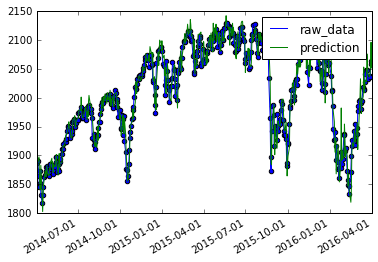

In [313]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 1

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

Connection refused
	Is the server running on host "127.0.0.1" and accepting
	TCP/IP connections on port 5432?

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day_dot", dpi=400)

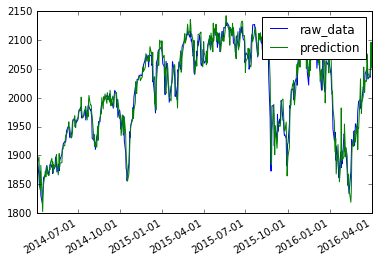

In [314]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day", dpi=400)

predict for  [50, 52]
predict for  [100, 102]
predict for  [150, 152]
predict for  [200, 202]
predict for  [250, 252]
predict for  [300, 302]
predict for  [350, 352]
predict for  [400, 402]
predict for  [450, 452]
predict for  [500, 502]
time for prediction: 1304.381864


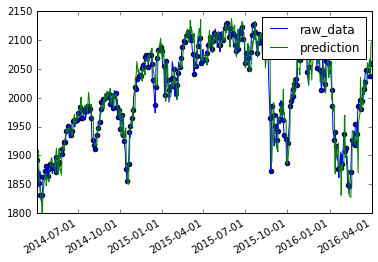

In [315]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 2

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2day_dot", dpi=400)

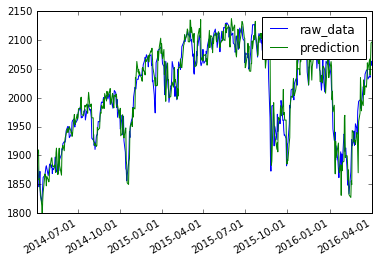

In [316]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2day", dpi=400)

predict for  [48, 51]
predict for  [96, 99]
predict for  [144, 147]
predict for  [192, 195]
predict for  [240, 243]
predict for  [288, 291]
predict for  [336, 339]
predict for  [384, 387]
predict for  [432, 435]
predict for  [480, 483]
time for prediction: 852.546261


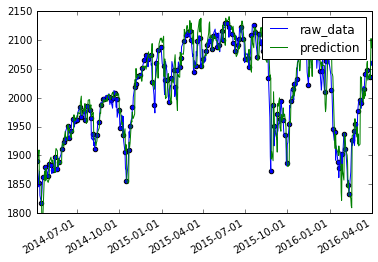

In [317]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 3

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_3day_dot", dpi=400)

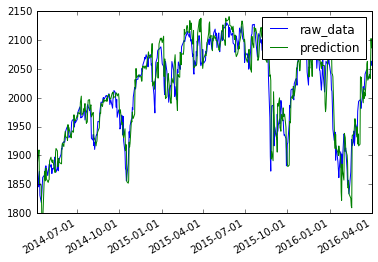

In [318]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_3day", dpi=400)

predict for  [50, 55]
predict for  [100, 105]
predict for  [150, 155]
predict for  [200, 205]
predict for  [250, 255]
predict for  [300, 305]
predict for  [350, 355]
predict for  [400, 405]
predict for  [450, 455]
predict for  [500, 504]
time for prediction: 499.157760


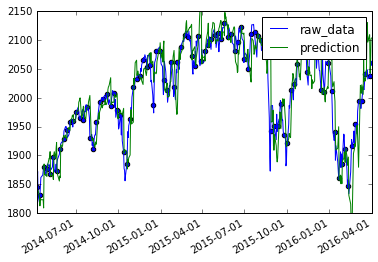

In [319]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 5

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1week_dot", dpi=400)

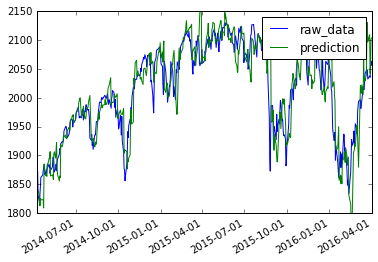

In [320]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1week", dpi=400)

predict for  [50, 60]
predict for  [100, 110]
predict for  [150, 160]
predict for  [200, 210]
predict for  [250, 260]
predict for  [300, 310]
predict for  [350, 360]
predict for  [400, 410]
predict for  [450, 460]
predict for  [500, 504]
time for prediction: 24.557446


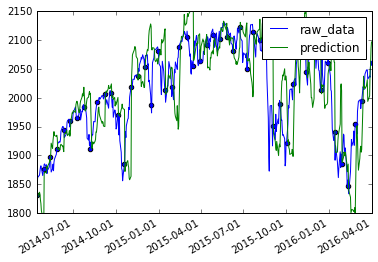

In [321]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 10

N_epoch = 100
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2week_dot", dpi=400)

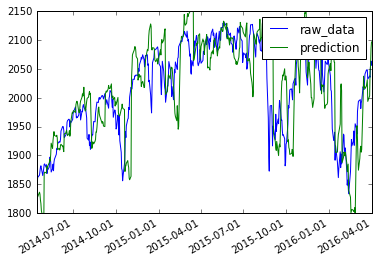

In [322]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2week", dpi=400)

predict for  [44, 66]
predict for  [88, 110]
predict for  [132, 154]
predict for  [176, 198]
predict for  [220, 242]
predict for  [264, 286]
predict for  [308, 330]
predict for  [352, 374]
predict for  [396, 418]
predict for  [440, 462]
predict for  [484, 504]
time for prediction: 106.624130


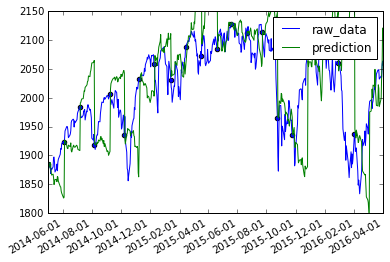

In [323]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 22

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1month_dot", dpi=400)

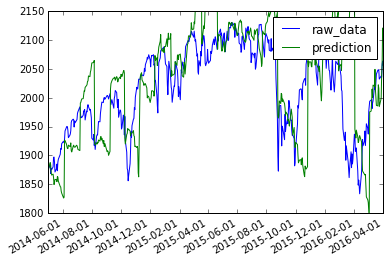

In [324]:
# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1month", dpi=400)

predict for  [44, 88]
predict for  [88, 132]
predict for  [132, 176]
predict for  [176, 220]
predict for  [220, 264]
predict for  [264, 308]
predict for  [308, 352]
predict for  [352, 396]
predict for  [396, 440]
predict for  [440, 484]
predict for  [484, 504]
time for prediction: 78.774574


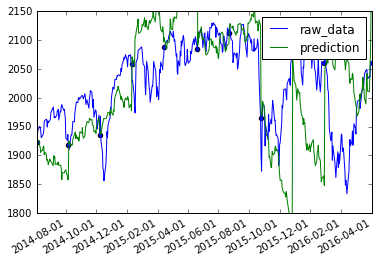

In [325]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 44

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_2month_dot", dpi=400)

predict for  [88, 176]
predict for  [176, 264]
predict for  [264, 352]
predict for  [352, 440]
predict for  [440, 504]
time for prediction: 62.388817


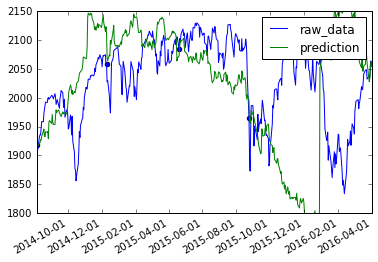

In [326]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 88

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_4month_dot", dpi=400)

learning on [0, 251]


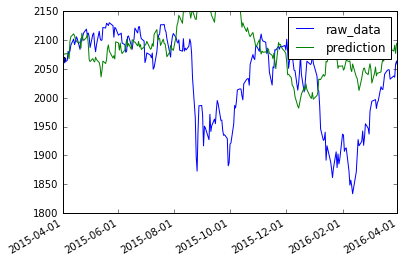

In [267]:
N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = int(0.5 * N_data)

N_epoch = 10000
N_memory = freq * 2
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1year_dot", dpi=400)

# Let's work on small subsets

We first　work on 10 randomly chosen elements subset

In [287]:
N_stocks = 10 # the numer of elements in subsets
align = np.arange(len(input_list))
np.random.shuffle(align)
input_data_sub1 = input_data[:, align[:10]]
input_list_sub1 = input_list[align[:10]]

TypeError: only integer arrays with one element can be converted to an index

In [288]:
input_list_sub1 = []
for i in xrange(N_stocks):
    input_list_sub1.append(input_list[align[i]])
    
print (input_list_sub1)

['TXN', 'ADI', 'FDX', 'V', 'AAL', 'UTX', 'ORAN', 'VZ', 'NOK', 'GD']


In [289]:
input_sub1_str = ""
length = 10
for i in xrange(len(input_list_sub1)):
    input_sub1_str += input_list_sub1[i] + ", "
    if (i + 1) % length == 0:
        input_sub1_str += "\n"
print (input_sub1_str)

TXN, ADI, FDX, V, AAL, UTX, ORAN, VZ, NOK, GD, 



predict for  [50, 51]
predict for  [100, 101]
predict for  [150, 151]
predict for  [200, 201]
predict for  [250, 251]
predict for  [300, 301]
predict for  [350, 351]
predict for  [400, 401]
predict for  [450, 451]
predict for  [500, 501]
time for prediction: 698.597248


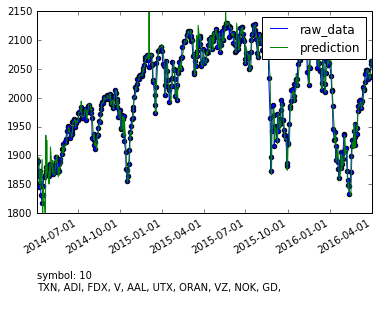

In [309]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 1

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[-N_pred],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_1day_dot", dpi=400)

In [327]:
f = open("S&P_10rand1.txt","w")
f.write("symbol: %d \n" % len(input_list_sub1) +  input__sub1_str)
f.close()

NameError: name 'input__sub1_str' is not defined

predict for  [50, 52]
predict for  [100, 102]
predict for  [150, 152]
predict for  [200, 202]
predict for  [250, 252]
predict for  [300, 302]
predict for  [350, 352]
predict for  [400, 402]
predict for  [450, 452]
predict for  [500, 502]
time for prediction: 344.833651


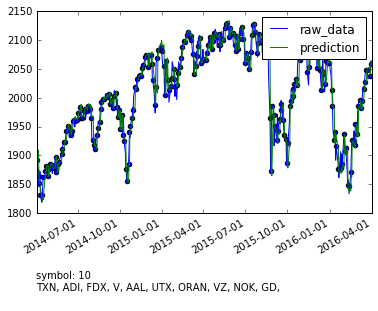

In [310]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 2

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_2day_dot", dpi=400)

predict for  [48, 51]
predict for  [96, 99]
predict for  [144, 147]
predict for  [192, 195]
predict for  [240, 243]
predict for  [288, 291]
predict for  [336, 339]
predict for  [384, 387]
predict for  [432, 435]
predict for  [480, 483]
time for prediction: 233.145493


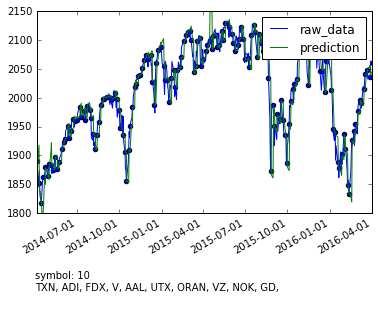

In [305]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 3

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_3day_dot", dpi=400)

predict for  [50, 55]
predict for  [100, 105]
predict for  [150, 155]
predict for  [200, 205]
predict for  [250, 255]
predict for  [300, 305]
predict for  [350, 355]
predict for  [400, 405]
predict for  [450, 455]
predict for  [500, 504]
time for prediction: 137.509243


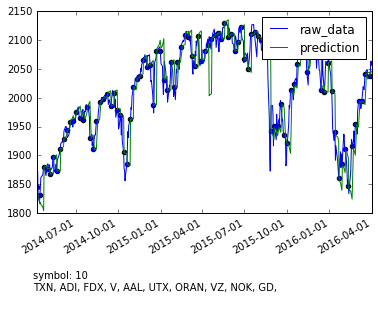

In [306]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 5

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_1week_dot", dpi=400)

predict for  [50, 60]
predict for  [100, 110]
predict for  [150, 160]
predict for  [200, 210]
predict for  [250, 260]
predict for  [300, 310]
predict for  [350, 360]
predict for  [400, 410]
predict for  [450, 460]
predict for  [500, 504]
time for prediction: 69.415323


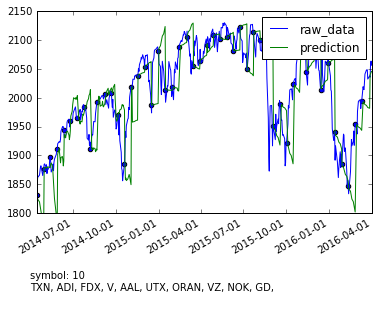

In [307]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 10

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_2week_dot", dpi=400)

predict for  [44, 66]
predict for  [88, 110]
predict for  [132, 154]
predict for  [176, 198]
predict for  [220, 242]
predict for  [264, 286]
predict for  [308, 330]
predict for  [352, 374]
predict for  [396, 418]
predict for  [440, 462]
predict for  [484, 504]
time for prediction: 30.980342


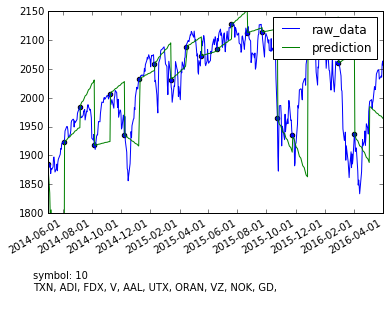

In [308]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 22

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_1month_dot", dpi=400)

predict for  [44, 88]
predict for  [88, 132]
predict for  [132, 176]
predict for  [176, 220]
predict for  [220, 264]
predict for  [264, 308]
predict for  [308, 352]
predict for  [352, 396]
predict for  [396, 440]
predict for  [440, 484]
predict for  [484, 504]
time for prediction: 15.281798


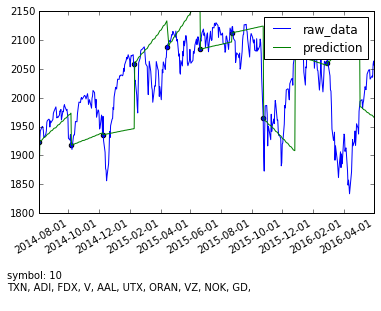

In [312]:
import time

N_in = len(input_list_sub1)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 44

N_epoch = 1000
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data_sub1, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)


# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data_sub1)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub1) +  input_sub1_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_2month_dot", dpi=400)

In [ ]:
N_stocks = 20 # the numer of elements in subsets
align = np.arange(len(input_list))
np.random.shuffle(align)
input_data_sub2 = input_data[:, align[:10]]

input_list_sub2 = []
for i in xrange(N_stocks):
    input_list_sub2.append(input_list[align[i]])
    
print (input_list_sub2)


input_sub2_str = ""
length = 10
for i in xrange(len(input_list_sub2)):
    input_sub2_str += input_list_sub2[i] + ", "
    if (i + 1) % length == 0:
        input_sub2_str += "\n"
print (input_sub2_str)

In [199]:
N_in = len(input_list_sub2)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 1

N_epoch = 100
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
prediction = online_train(lstm, model, optimizer, input_data_sub2, target_data, 
                          N_memory=100, renew_freq=freq, N_epoch=N_epoch)               

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)


N_data = len(input_data_sub2)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date_label[i * freq], target_data[i * freq])
ax.plot(date_label, target_data, label="raw_data", c='b')
ax.plot(date_label, prediction[:N_data], label="prediction", c='g')

# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.ylim(1800, 2150)

text(date[0],    1700, "symbol: %d \n" % len(input_list_sub2) +  input_sub2_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_10rand1_1day_dot", dpi=400)

InvalidType: 
Invalid operation is performed in: LinearFunction (Forward)

Expect: prod(in_types[0].shape[1:]) == in_types[1].shape[1]
Actual: 10 != 20

In [40]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 1

N_epoch = 100
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)



# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day_dot", dpi=400)

predict for  [50, 51]
predict for  [100, 101]
predict for  [150, 151]


KeyboardInterrupt: 

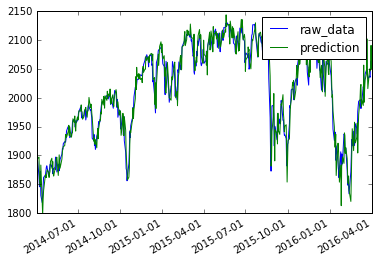

In [39]:
# X軸データ
x = [datetime.datetime(2010,1,1), datetime.datetime(2010,1,2),
     datetime.datetime(2010,1,3), datetime.datetime(2010,1,4),
     datetime.datetime(2010,1,5)]

# Y軸データ
y = [1, 3, 2, 4, 1]

# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)



# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
"""
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
"""
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day_dot", dpi=400)

In [50]:
from itertools import izip


def online_train2(lstm, model, optimizer, x_train, y_train, 
                             N_memory=100, renew_freq=10, N_epoch=10):
    prediction_list = [y_train[0]]
    df_input = np.log(x_train[1:] / x_train[:-1])
    df_target = np.log(y_train[1:] / y_train[:-1])
    df_target = df_target.reshape(len(df_target), 1)
    if N_memory <= renew_freq:
        N_memory = renew_freq
    #N_data will be the length of term -1
    N_data = len(df_input)
    N_renew = N_data / renew_freq
    print_every = N_renew / 10
    if print_every == 0:
        print_every = 1
    begin = 0
    for i in xrange(N_renew):
        end = (i + 1) * renew_freq
        future_end = end + renew_freq
        if i == N_renew - 1:
            if end == N_data:
                continue
            else:
                future_end = N_data
                
        #fix the number of data used for learning
        if end > N_memory:
            begin  = end - N_memory
            
        if (i + 1) % print_every == 0:
            print ("predict for  [%d, %d]" % (end, future_end))
            
        x_v = Variable(np.array(df_input[begin: end], dtype=np.float32))
        y_v = Variable(np.array(df_target[begin: end], dtype=np.float32))
        #learning
        for epoch in range(N_epoch):
            lstm.reset_state()
            model.zerograds()
            loss = model(x_v, y_v)
            loss.backward()
            optimizer.update()
        # prediction   
        x_v_pred = Variable(np.array(df_input[end: future_end], dtype=np.float32)) 
        lstm.reset_state()
        pre_out = Variable(x_v_pred.data)
        output = model.predictor(pre_out)
        prediction = y_train[end] * np.cumprod(np.exp(output.data))
        prediction_list += list(prediction)
        print (np.abs(np.exp(output.data) - np.exp(df_target[end: end + renew_freq])))
    return prediction_list

[[ 0.00207509]]
[[ 0.00271649]]
[[ 0.01740383]]
[[ 0.00950329]]
[[ 0.00794546]]
[[ 0.01010066]]
[[ 0.02778388]]
[[ 0.00810877]]
[[ 0.01471386]]
[[ 0.0116678]]
[[ 0.00849204]]
[[ 0.00046049]]
[[ 0.00709778]]
[[ 0.00816043]]
[[ 0.00073204]]
[[ 0.00025526]]
[[ 0.00359038]]
[[ 0.00599111]]
[[ 0.00419453]]
[[ 0.00786049]]
[[ 0.00503014]]
[[ 0.00827121]]
[[ 0.00153607]]
[[ 0.01391797]]
[[ 0.00778188]]
[[ 0.0018508]]
[[ 0.00170789]]
[[ 0.01169357]]
[[ 0.00437124]]
[[ 0.00733636]]
[[ 0.0134581]]
[[ 0.00453611]]
[[ 0.00251269]]
[[ 0.01187678]]
[[ 0.00469441]]
[[ 0.00691628]]
[[ 0.00826943]]
[[ 0.00353258]]
[[ 0.00317854]]
[[ 0.00327481]]
[[ 0.00389868]]
[[ 0.0020005]]
[[ 0.00591172]]
[[ 0.00317812]]
[[ 0.00444845]]
[[ 0.00165118]]
[[ 0.00108857]]
[[ 0.00199134]]
[[ 0.00122274]]
predict for  [50, 51]
[[ 0.00863608]]
[[ 0.00221961]]
[[ 0.00229024]]
[[ 0.00421838]]
[[ 0.00806376]]
[[ 0.00083129]]
[[ 0.00016574]]
[[ 0.00085964]]
[[ 0.00196933]]
[[ 0.00481781]]
[[ 0.0024757]]
[[ 0.00090322]]
[[ 0.00

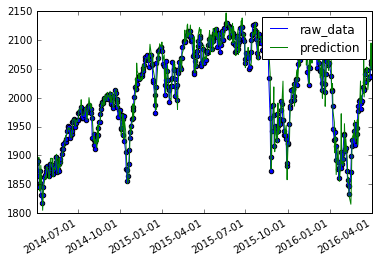

In [51]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 1

N_epoch = 100
N_memory = max(2 * freq, 50)
lstm = LSTM(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train2(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)



# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

N_data = len(input_data)
N_freq = N_data / freq
for i in xrange(N_freq):
    ax.scatter(date[i * freq], target_data[i * freq])
ax.plot(date[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date[-N_pred], date[-1])
plt.ylim(1800, 2150)

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

plt.savefig("S&P_1day_dot", dpi=400)